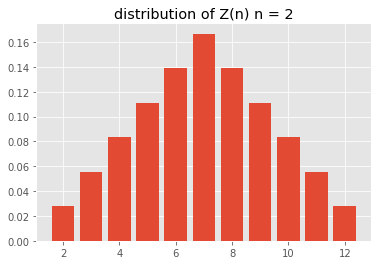

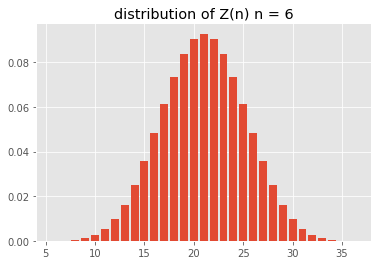

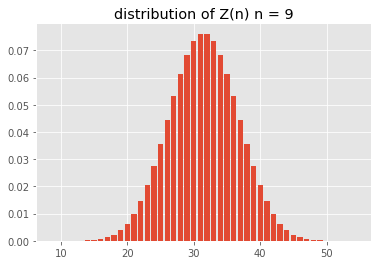

In [5]:
import random 
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
from matplotlib import style

from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk





class Window(Frame):
    def __init__(self, master= None):
 
        Frame.__init__(self, master)
        self.master = master
        self.init_window()
        self.dp = np.ones((1, 6), dtype=np.float64);
 
    def init_window(self):
 
        self.master.title('値Z(n)に関する確率分布グラフ')
 
        self.pack(fill=BOTH, expand=1)
        
        Label(self.master,text='サイコロを投げた回数ｎ(Number of times the dice are thrown n ):').place(x=30, y=20)
        self.num = Entry(self.master)
        self.num.place(x=35, y=45)
        Button(self.master,text='計算(n<396)', command=self.calculate).place(x=200, y=40, width=190)
        
        
    def calculate(self):
        if len(self.num.get()) > 0 :
            n = int(self.num.get())
            style.use('ggplot')
            x_max = n*6
            x_min = n
            interval = range(x_max+1)[x_min:]
            plt.bar(interval,self.getRes(n))
            plt.title('distribution of Z(n) n = ' + str(n))
            plt.savefig(path, dpi=700)
            plt.show()
            img = Image.open(path)
            img = img.resize((410, 340))
            img.save(path)
            self.showImg()

            
    def getRes(self,n):
        x = self.dp.shape[0]
        y = self.dp.shape[1]
        if x >= n+1:
            sum1 = 0
            val = []
            for i in range(n,6*n+1):
                sum1 += self.dp[n][i]
                val.append(self.dp[n][i])
            val = val/sum1
            return val
        else:
            sum1 = 0
            val = []
            for i in range(x,n+1):
                self.dp = np.row_stack((self.dp,np.zeros((1, y), dtype=np.float64)))
            for i in range(x,n+1):
                self.dp = np.column_stack((self.dp,np.zeros((n+1,6), dtype=np.float64)))
            for i in range(x,n+1):
                for j in range(i-1,6*(i-1)+1):
                    for k in range(1,7):
                        self.dp[i][j+k] += self.dp[i-1][j];
                        
            for i in range(n,6*n+1):
                sum1 += self.dp[n][i]
                val.append(self.dp[n][i])
            self.dp[n] /= sum1
            val = val/sum1
            return val
 
    def showImg(self):
        load = Image.open(path)
        render= ImageTk.PhotoImage(load)
 
        img = Label(self,image=render)
        img.image = render
        img.place(x=20,y=90)
        
#change path here to run the programme 
path = "e:\\distribution.png" 
root = Tk()
root.geometry("450x450")
app = Window(root)
root.mainloop()